In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from matplotlib.pyplot import figure
import ass

In [10]:
path = r'C:\Users\jagos\Desktop\Speech REcognition\english_test.ass'

In [54]:
def pause_labeling_for_dataframe(data):
    df = copy.deepcopy(data)
    labels = []
    
    for i in range(len(df[0])):
        if df[0][i] == '':
            labels.append('pause')
            pass
        else:
            labels.append('word')
            pass
        pass
    
    df.append(labels)
    
    return df

In [102]:
def pause_diagram(df):
    
    x1_values=[]
    x2_values=[]
    y1_values=[]
    y2_values=[]
    
    for i in range(len(df[2])):
        if df[2][i]=='pause':
            y2_values.append(-df[1][i])
            x2_values.append(i)
            pass
        else:
            y1_values.append(df[1][i])
            x1_values.append(i)
            pass
        pass
    
    figure(figsize=(10, 4), dpi=150)
    
 
    plt.stem(x1_values, y1_values, markerfmt=' ', basefmt='black', linefmt='blue', use_line_collection=True)
    plt.stem(x2_values, y2_values, markerfmt=' ', basefmt='black', linefmt='crimson', use_line_collection=True)
    plt.show()
    pass

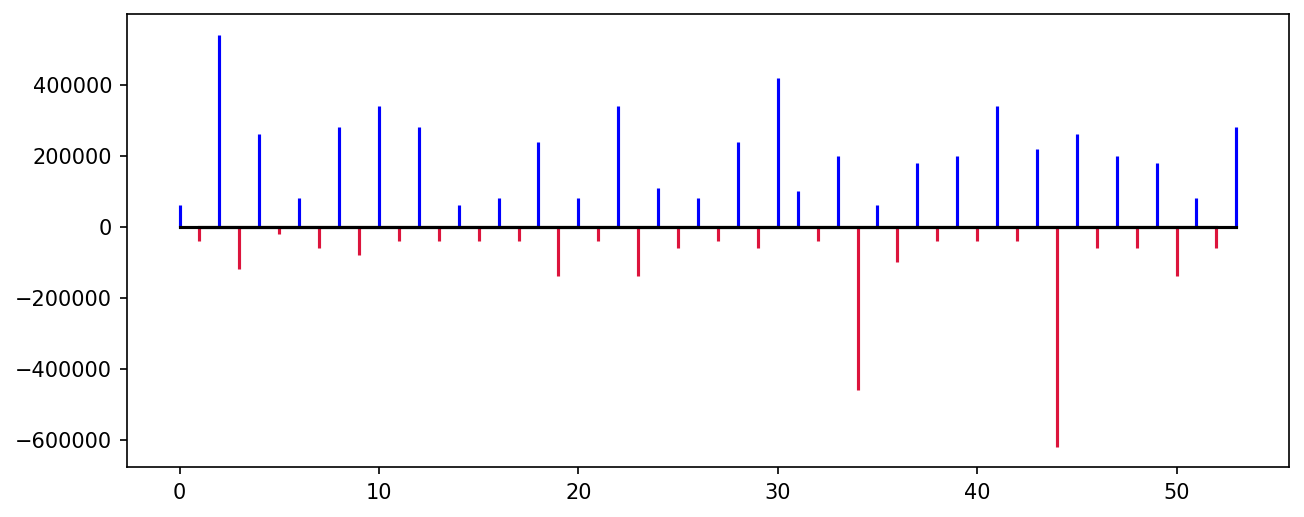

In [103]:
pause_diagram(pause_labeling_for_dataframe(ASSPath_to_2DTimeSeries(path)))

In [1]:
# ms-Bereich so richtig? Gegenchecken

In [105]:
def Line_to_SpokenWord(line):
    word = ''
    linesplit = line.split()
    
    for i in range(len(linesplit)):
        if '{\\r}' in linesplit[i]:
            word = linesplit[i][15:]
            word = word[:-4]
            pass
        else:
            pass
        pass
    
    return word

In [106]:
def TimeData_to_Microseconds(event_time):
    return event_time.microseconds + event_time.seconds*1000000

In [107]:
def ASSPath_to_2DTimeSeries(path):
    time_series = [[],[]]
    
    with open(path, encoding='utf_8_sig') as file:
        document = ass.parse(file)
    
    for event in document.events:
        time_series[0].append(Line_to_SpokenWord(event.text))
        time_series[1].append(TimeData_to_Microseconds(event.end) - TimeData_to_Microseconds(event.start))
        pass
    
    return time_series